In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path=r"C:\Users\sneha\Documents\Data_files\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [3]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [4]:
#Read the continent column
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- there are total 25480 aplicants are there
- In that 25480 applicants 17018 applicants got the visa
- 8462 applicants did not get the visa
- also there are 16861 applicants are applied for visa from asia
- we want to know how many applicants from asia got certified
- and how many apllicant from asia got denied

In [ ]:
#step-1: slect the continent data
#step-2: continent data == 'Asia' it is con1
#step-3: slect the case status data
#step-4: con=con1&con2
#step=5: apply main df on can get the len

In [7]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1 & con2
len(visa_df[con])

11012

In [10]:
#from different continents how many ppl are certified
lables=visa_df['continent'].unique()
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con=con1 & con2
    print( len(visa_df[con]))

11012
397
2037
2957
493
122


In [15]:
lables=visa_df['continent'].unique()
certi_count,deni_count=[],[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1&con3
    certi_count.append(len(visa_df[cert_con]))
    deni_count.append(len(visa_df[den_con]))
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip(certi_count,deni_count),columns=cols,index=lables)

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


#shorcut
## cross tab

In [19]:
#pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)

<Axes: xlabel='continent'>

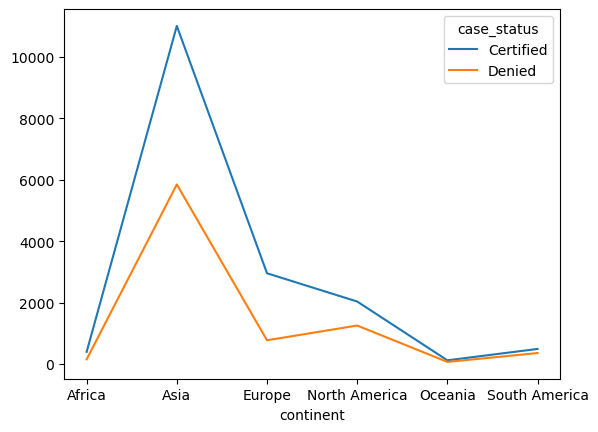

In [20]:
r1.plot()

<Axes: xlabel='continent'>

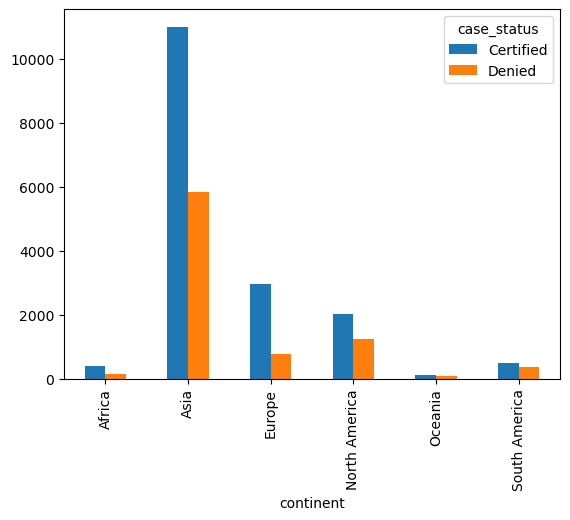

In [22]:
r1.plot(kind='bar')

## case status-continent-education_of_employee

In [ ]:
# ffrom asia there 16k application applied for visa
# in that 11k+ ppl got certified
# in that 11k ppl different education applications are available
# we want those information

In [25]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
pd.crosstab(col1,cols)

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

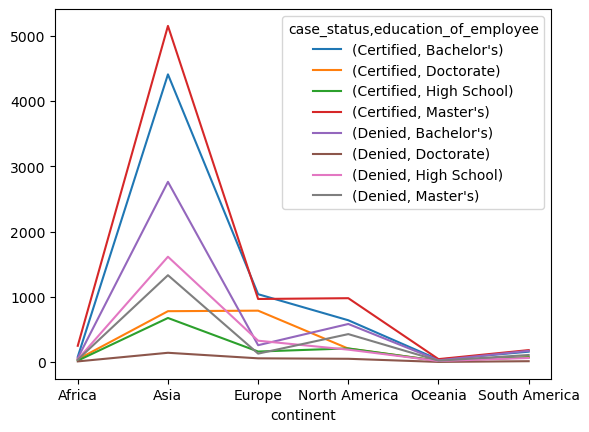

In [26]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
r2=pd.crosstab(col1,cols)
r2.plot()


## group by

In [31]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [30]:
visa_df['prevailing_wage']
#wages are numerical values
#25480 applicants are available
# different applicants having the different wages

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [34]:
list=(visa_df.groupby('education_of_employee'))


In [35]:
visa_df.groupby('education_of_employee').count()


,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [36]:
visa_df.groupby('education_of_employee').size()


education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [37]:
#based on group ny select an another column
visa_df.groupby('education_of_employee')['prevailing_wage']

In [38]:
visa_df['prevailing_wage'].mean()
# mean wage of all 24580 observation
# bachels , Doctors, Hs, master

np.float64(74455.81459209183)

In [42]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [43]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [44]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [46]:
con=visa_df['case_status']=='Denied'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [48]:
# i want to konw min wage of the asia ppl
visa_df['prevailing_wage'].min()
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [49]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

- we have seen continent and case status
- we have seen three variable **continent, case status and education of employee**
- we also dont similar analysis using group by
- only categorical column analysis completed
- only numerical column analysis completed
- also Bi variate and multivariate analysis also completed
- now we need to perform two numerical column analysis
     - this will give relation between two columns which are numerica in nature
     - so we can perform **correlation matrix** to get the relationship
     - also we need to perfrom **scatter plot** to visualize the relation

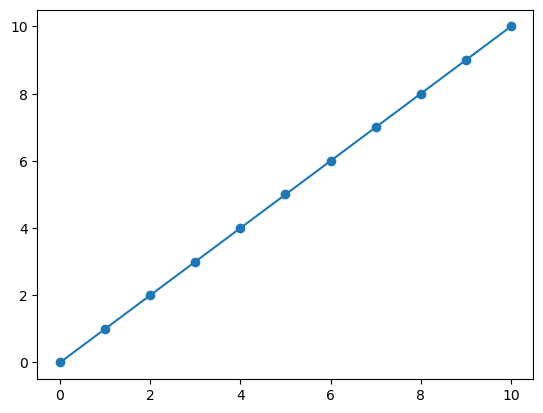

In [3]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

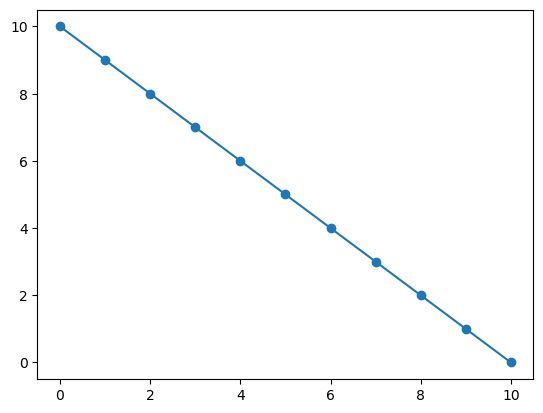

In [4]:
x=range(0,11)
y=range(10,-1,-1)
plt.scatter(x,y)
plt.plot(x,y)

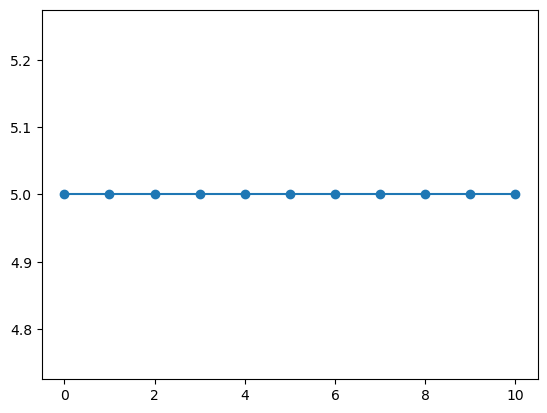

In [5]:
x=range(0,11)
y=[5 for i in range(0,11)]
plt.scatter(x,y)
plt.plot(x,y)

In [6]:
visa_df.corr()

ValueError: could not convert string to float: 'EZYV01'

In [7]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


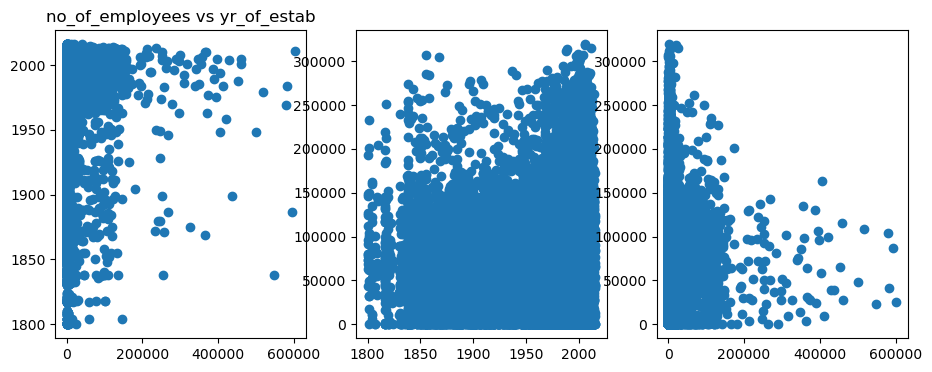

In [11]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(11,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

In [ ]:
# winequal dataset
# load the dataset
# perform the correlation

In [22]:
file_path=r"C:\Users\sneha\Documents\Data_files\winequality_red.csv"
wine_data=pd.read_csv(file_path)
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
wine_data_corr=wine_data.corr()
wine_data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [25]:
visa_corr=visa_df.corr(numeric_only=True)
visa_corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**
- any matrix values we can visaulize using a heat map
- heat map will provide colors for diffrent values
- heat map also provides colors bar which indicates , the color and its value
- for ex the values ranges from 0:8 to 1 display as **blue color**
- so we no need to check values, we can directly see the blue color
- so immediately we can sense  blue color means highest values which is 0.8 to 1
- heat map available in **sea born**

<Axes: >

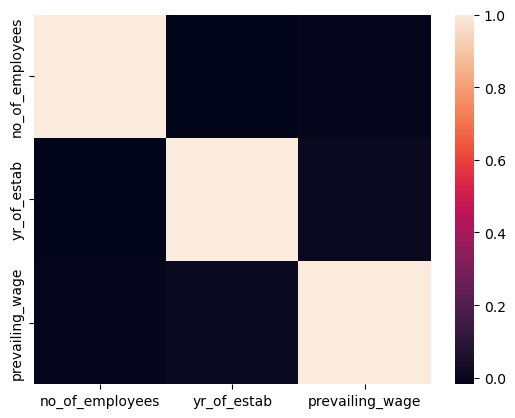

In [26]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr)


<Axes: >

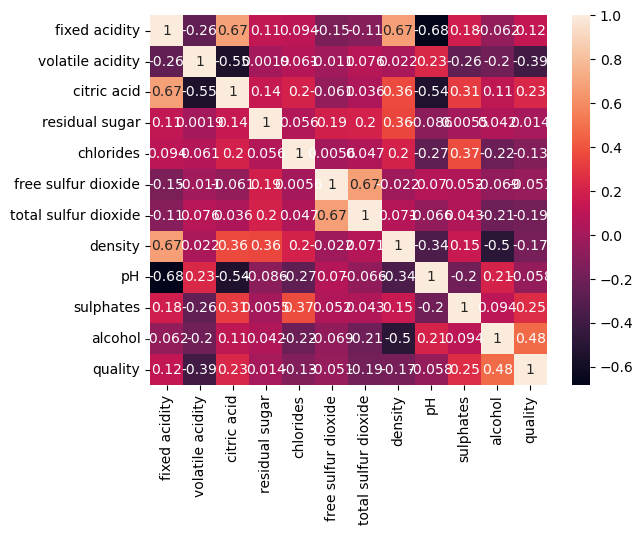

In [28]:
wine_data_corr=wine_data.corr(numeric_only=True)
sns.heatmap(wine_data_corr,annot=True)

In [29]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

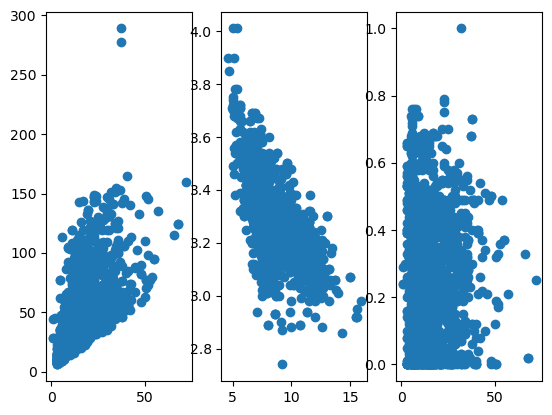

In [31]:
col1=wine_data['free sulfur dioxide']
col2=wine_data['total sulfur dioxide']
col3=wine_data['fixed acidity']
col4=wine_data['pH']
col5=wine_data['citric acid']
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)
